## **Write down the code for NN Training and Prediction** (20 points)

`It should work for any given data given features and class label

Write down code from scratch for a N layer neural network for multiclass classification.

You must 
1. Use Vectorization - 4 points
2. Just use iterations (no need for convergence condition)
3. Multi-class problem - use softmax and cross entropy - 2 points
4. Code should work for any number of hidden layers provided as input - 4 points
5. Add L2 regularization - 2 points
```
  You training function will take as input: X, y, max_iter=1000, alpha=0.01, and hidden_layers=[5, 6, 7]
  Where hidden_layers=[5, 6, 7] means that your neural network will have 3 hidden layers with first hidden layer having 5 hidden units, second hidden layer having 6 hidden units, and 3rd hidden layer having 7 hidden units.
```
5. Split data into training and test. 
  Plot your error curves for training and validation errors (cost and accuracy)  

>
1.   For different number of hidden layers (1, 2, 3, 4, 5, etc) - 2 points
2.   For different alpha values (choosing the "best" hidden layer configuration from the previous item) - 2 points
3. For different values of lambda (regularization parameter) (lambda = 0 means no regularization, lambda > 0 means you are regularizing). "lambda" is a reserved keyword in python so use some other variable name say to denote it. - 2 points

Briefly discuss which configuration worked best and why you think it worked well. Why other configurations did not work as well. - 2 points

Installing all the necessary libraries

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from keras.datasets import mnist
from sklearn.utils import shuffle

Using TensorFlow backend.


# Load Data Set and Visualization of Data



In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


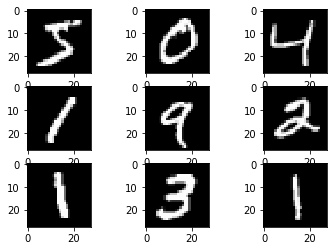

In [0]:
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i], cmap = plt.get_cmap('gray'))
# show the figure
plt.show()

# Preprocessing the Data by Flattening the Images into vector

In [0]:
X_train = X_train.reshape(60000, 28*28)
X_test  = X_test.reshape(10000, 28*28)
X_train = X_train.astype('float32') 
X_test  = X_test.astype('float32')
X_train /= 255
X_test  /= 255

In [0]:
ohe = OneHotEncoder()
y_train, y_test = ohe.fit_transform(y_train.reshape(-1, 1)).toarray(), ohe.fit_transform(y_test.reshape(-1, 1)).toarray()

In [0]:
print("Final Shape of Data: ")
print("X_train Shape: ", X_train.shape)
print("y_train Shape: ", y_train.shape)
print("X_test Shape: ", X_test.shape)
print("y_test Shape: ", y_test.shape)

Final Shape of Data: 
X_train Shape:  (60000, 784)
y_train Shape:  (60000, 10)
X_test Shape:  (10000, 784)
y_test Shape:  (10000, 10)


# Initializing the parameters i.e. weights and bias

In [0]:
def initialization(input_dim,hidden_layers,class_labels):
    np.random.seed(42)
    n = len(hidden_layers)
    weights = {}
    bias = {}
    weights['w0'] = np.random.randn(input_dim,hidden_layers[0])*np.sqrt(2/hidden_layers[0])
    bias['b0'] = np.random.randn(1,hidden_layers[0])*np.sqrt(2/hidden_layers[0])
    for i in range(1,n):
        weights['w'+str(i)] = np.random.randn(hidden_layers[i-1],hidden_layers[i])*np.sqrt(2/hidden_layers[i])
    for i in range(1,n):
        bias['b'+str(i)] = np.random.randn(1,hidden_layers[i])*np.sqrt(2/hidden_layers[i])
    weights['w'+str(n)] = np.random.randn(hidden_layers[n-1],class_labels)*np.sqrt(2/class_labels)
    bias['b'+str(n)] = np.random.randn(1,class_labels)*np.sqrt(2/class_labels)
    return weights,bias
        

# plotting function to plot the cost and accuracy on trainin set

In [0]:
def plotting(cost,accuracy):
  plt.style.use('dark_background')
  fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (16, 6))
  axes[0].plot(list(range(len(cost))), cost, c = 'Red')
  axes[0].set_title('Iterations vs Cost')
  axes[0].set_xlabel('Iterations')
  axes[0].set_ylabel('Cost')
  accuracy = [element * 100 for element in accuracy]
  axes[1].plot(list(range(len(accuracy))), accuracy, c = 'green')
  axes[1].set_title('Iterations vs Accuracy')
  axes[1].set_xlabel('Iterations')
  axes[1].set_ylabel('Accuracy %')
  


# cross entropy and calculate accuracy function

In [0]:
def calculate_cost(y_predict, y):
    m = y_predict.shape[1]
    cost = (-1 / m) * np.sum(y * np.log(y_predict))
    return np.squeeze(cost)
def calculate_accuracy(y_predict, y):
    y_predict = np.argmax(y_predict, axis = 1)
    y = np.argmax(y, axis = 1)
    
    return (np.sum(y_predict == y) / len(y_predict))

# Implementing L2-NORM or cost with regularization

In [0]:
def cost_with_regularization(y_pred,y,weights,lam,n):
  cross_entropy = calculate_cost(y_pred,y)
  m = y.shape[0]
  L2_cost = 0
  for i in range(n+1):
    L2_cost += (np.sum(np.square(weights['w'+str(i)])))*(lam/(2*m))
  cost = cross_entropy + L2_cost
  cost = np.squeeze(cost)
  assert(isinstance(cost, float))
  return cost


  

# helper functions for training 

In [0]:
def class_labels(y):
    return np.argmax(y,axis = 1)

In [0]:
def linear_func(x,w,b):
    return np.dot(x,w)+b

In [0]:
def relu_derivative(inputs):
    return np.where(inputs <=0 ,0,1)

In [0]:
def tanh_func(z):
    return np.tanh(z)

In [0]:
def tanh_der(z):
    return 1 - np.square(z)

In [0]:
def relu_func(inputs):
    return np.maximum(0,inputs)

In [0]:
def softmax(z):
    return (np.exp(z.T) / np.sum(np.exp(z), axis=1)).T

# updating the weights and bias with their partial derivatives

In [0]:
def update_parameters(n,weights,bias, update_w,update_b, learning_rate):
    for index in range(n+1):
        weights['w' + str(index)] -= learning_rate * update_w['w' + str(index)]
        bias['b' + str(index)] -= learning_rate * update_b['b' + str(index)]
        
    return weights,bias

# Backward Propogation for N - Layer network with L2-regularization

In [0]:
def backward(X,y,n,weights,bias,activation,linear,y_pred,lam):
    grads = {}
    update_w = {}
    update_b = {}
    
    m = X.shape[0]
    grads['D' + str(n)] = (y_pred - y).T
    update_w['w' + str(n)] = (1 / m) * np.dot(activation['a' + str(n - 1)].T, grads['D' + str(n)].T) + (lam/m) * weights['w'+str(n)]
    update_b['b' + str(n)] = (1 / m) * np.sum(grads['D' + str(n)])
    for i in range(n - 1, 0, -1):
        grads['D' + str(i)] = np.dot(weights['w' + str(i + 1)], grads['D' + str(i + 1)]) * relu_derivative(linear['l' + str(i)].T)
    
    for i in range(n - 1, 0, -1):
        update_w['w' + str(i)] = (1 / m) * np.dot(activation['a' + str(i - 1)].T, grads['D' + str(i)].T) + (lam/m) * weights['w'+str(i)]
        update_b['b' + str(i)] = (1 / m) * np.sum(grads['D' + str(i)], axis = 1)
        
    grads['D'  + str(0)] = np.dot(weights['w'+str(1)],grads['D'+str(1)]) * relu_derivative(linear['l' + str(0)].T) 
    update_w['w' + str(0)] = (1/m) * np.dot(X.T,grads['D'+str(0)].T) + (lam/m) * weights['w'+str(0)]
    update_b['b' + str(0)] = (1/m) * np.sum(grads['D'+str(0)])
    
    
    return update_w,update_b
    
    

# Forward Propogation for N - Layer network

In [0]:
def forward(X,y,max_iter = 1000,eta = 0.01,lam = 0.1,hidden_layers = [120,100,50,20]):
    input_dim = X.shape[1]
    class_labels = 10
    n = len(hidden_layers)
    weights,bias = initialization(input_dim,hidden_layers,class_labels)
    linear = {}
    activation = {}
    X, y = shuffle(X, y)
    cost = []
    accuracy = []
    for it in range(max_iter):
        linear['l0'] = linear_func(X,weights['w0'],bias['b0'])
        activation['a0'] = relu_func(linear['l0'])
        for i in range(1,n):
            linear['l'+str(i)] = linear_func(activation['a'+str(i-1)],weights['w'+str(i)],bias['b'+str(i)])
            activation['a'+str(i)] = relu_func(linear['l'+str(i)])
        linear['l'+str(n)] = linear_func(activation['a'+str(n-1)],weights['w'+str(n)],bias['b'+str(n)])
        activation['a'+str(n)] = softmax(linear['l'+str(n)])
        y_pred = activation['a'+str(n)]
        cost_a = cost_with_regularization(y_pred, y,weights,lam,n)
        accuracy_a = calculate_accuracy(y_pred, y)
        cost.append(calculate_cost(y_pred, y))
        accuracy.append(calculate_accuracy(y_pred, y))
        if (it % 100) == 0:
            print("Epoch: " + str(it + 1) + ", Cost = " + str(np.round(cost_a, 2)) + ", Accuracy = " + 
                  str(np.round(accuracy_a * 100, 2)) + "%")
        u_w,u_b = backward(X,y,n,weights,bias,activation,linear,y_pred,lam)
        weights,bias = update_parameters(n,weights,bias, u_w,u_b, eta)
    plotting(cost,accuracy)

    return weights,bias
        
        

# function to predict on test_set

In [0]:
def predict(x_test,weights,bias,hidden_layers):
  n = len(hidden_layers)
  linear = {}
  activation = {}
  linear['l0'] = linear_func(x_test,weights['w0'],bias['b0'])
  activation['a0'] = relu_func(linear['l0'])
  for i in range(1,n):
    linear['l'+str(i)] = linear_func(activation['a'+str(i-1)],weights['w'+str(i)],bias['b'+str(i)])
    activation['a'+str(i)] = relu_func(linear['l'+str(i)])
  linear['l'+str(n)] = linear_func(activation['a'+str(n-1)],weights['w'+str(n)],bias['b'+str(n)])
  activation['a'+str(n)] = softmax(linear['l'+str(n)])
  y_pred = activation['a'+str(n)]
  return y_pred
  

  


# Observations and Results

Training on 1st set of parameters :
Epoch: 1, Cost = 34611.05, Accuracy = 13.12%
Epoch: 101, Cost = 2512.65, Accuracy = 87.4%
Epoch: 201, Cost = 1934.53, Accuracy = 90.53%
Epoch: 301, Cost = 1651.78, Accuracy = 91.98%
Epoch: 401, Cost = 1469.88, Accuracy = 92.89%


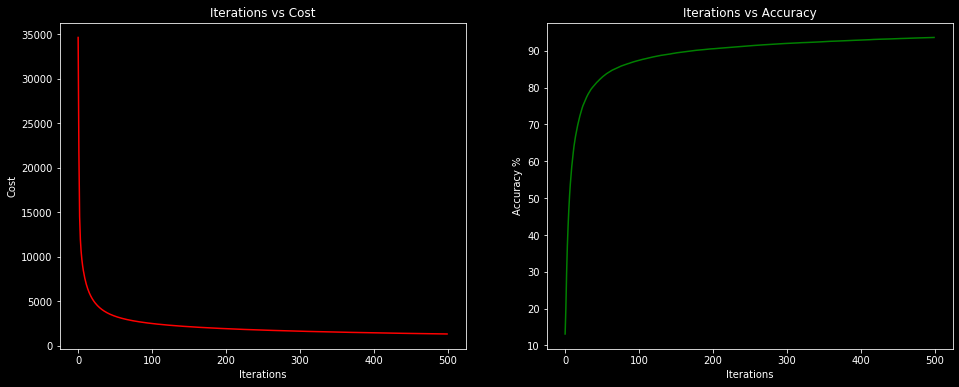

In [0]:
print("Training on 1st set of parameters :")
weight_1,bias_1 = forward(X_train,y_train,max_iter = 500,eta = 0.1,lam = 0.5,hidden_layers=[120])


Training on 2nd set of parameters :
Epoch: 1, Cost = 30739.88, Accuracy = 8.33%
Epoch: 101, Cost = 1953.68, Accuracy = 90.3%
Epoch: 201, Cost = 1462.17, Accuracy = 92.8%
Epoch: 301, Cost = 1220.37, Accuracy = 94.03%
Epoch: 401, Cost = 1064.07, Accuracy = 94.75%


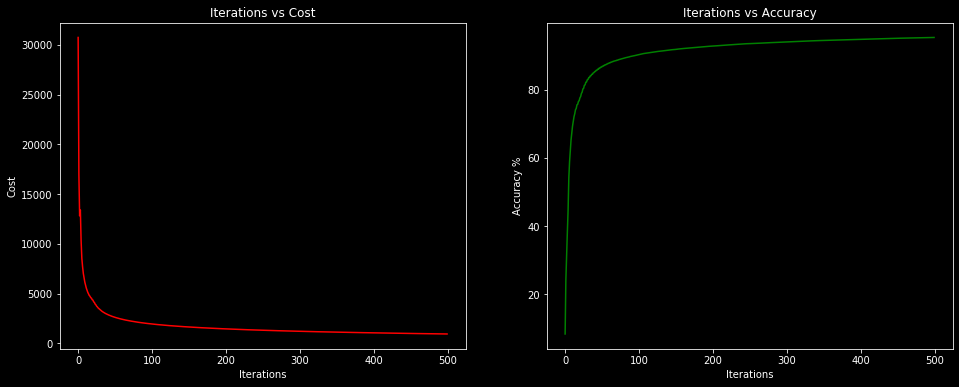

In [0]:
print("Training on 2nd set of parameters :")
weight_2,bias_2 = forward(X_train,y_train,max_iter = 500,eta = 0.1,lam = 0.5,hidden_layers=[150,100])

Training on 3rd set of parameters :
Epoch: 1, Cost = 32214.63, Accuracy = 12.92%
Epoch: 101, Cost = 2135.99, Accuracy = 89.17%
Epoch: 201, Cost = 1508.32, Accuracy = 92.5%
Epoch: 301, Cost = 1224.43, Accuracy = 93.93%
Epoch: 401, Cost = 1052.21, Accuracy = 94.76%


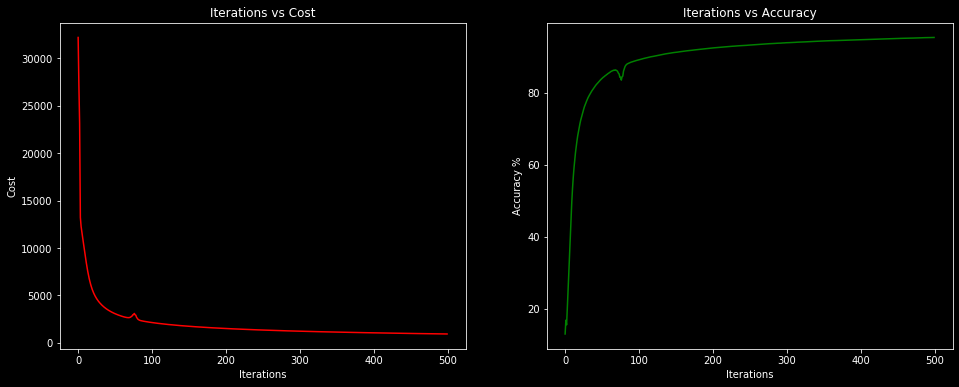

In [0]:
print("Training on 3rd set of parameters :")
weight_3,bias_3 = forward(X_train,y_train,max_iter = 500,eta = 0.1,lam = 0.5,hidden_layers=[120,100,70])

Training on 4th set of parameters :
Epoch: 1, Cost = 39491.29, Accuracy = 9.39%
Epoch: 101, Cost = 2033.39, Accuracy = 90.0%
Epoch: 201, Cost = 1365.61, Accuracy = 93.18%
Epoch: 301, Cost = 1097.04, Accuracy = 94.54%
Epoch: 401, Cost = 933.39, Accuracy = 95.36%


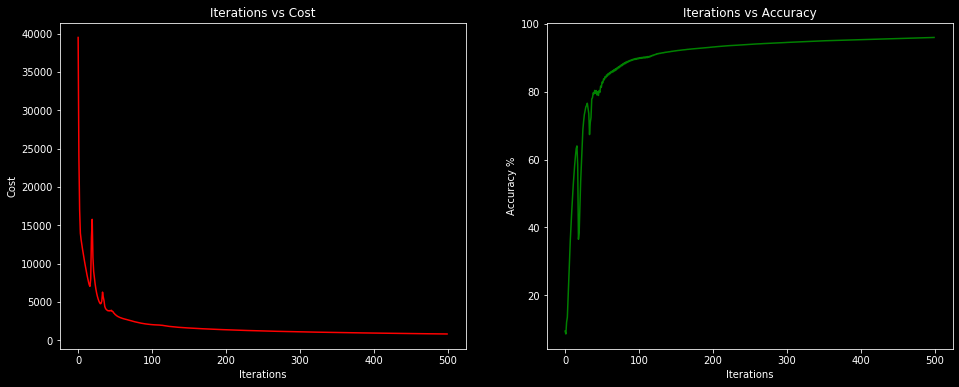

In [0]:
print("Training on 4th set of parameters :")
weight_4,bias_4 = forward(X_train,y_train,max_iter = 500,eta = 0.1,lam = 0.5,hidden_layers=[185,84,60,70])

### Testing accuracies after varying the hidden_layer parameter

In [0]:
y_predicted_1 = predict(X_test,weight_1,bias_1,[120])
y_predicted_2 = predict(X_test,weight_2,bias_2,[150,100])
y_predicted_3 = predict(X_test,weight_3,bias_3,[120,100,70])
y_predicted_4 = predict(X_test,weight_4,bias_4,[185,84,60,70])


test_accuracy_1 = calculate_accuracy(y_predicted_1, y_test)
test_accuracy_2 = calculate_accuracy(y_predicted_2, y_test)
test_accuracy_3 = calculate_accuracy(y_predicted_3, y_test)
test_accuracy_4 = calculate_accuracy(y_predicted_4, y_test)


print("Accuracy on Test Set with first configuration = " + str(test_accuracy_1 * 100) + "%")
print("Accuracy on Test Set with second configuration = " + str(test_accuracy_2 * 100) + "%")
print("Accuracy on Test Set with third configuration = " + str(test_accuracy_3 * 100) + "%")
print("Accuracy on Test Set with fourth configuration = " + str(test_accuracy_4 * 100) + "%")


Accuracy on Test Set with first configuration = 93.56%
Accuracy on Test Set with second configuration = 94.59%
Accuracy on Test Set with third configuration = 94.48%
Accuracy on Test Set with fourth configuration = 94.86%


### Testing accuracies with four layers is high compare to other no of layers : choosing 4 layers as a hidden_layer parameter for further analysis




### Training on different alpha or eta values(learning rates)

Epoch: 1, Cost = 39491.29, Accuracy = 9.39%
Epoch: 101, Cost = 14586.29, Accuracy = 20.47%
Epoch: 201, Cost = 11765.75, Accuracy = 32.6%
Epoch: 301, Cost = 10044.78, Accuracy = 43.5%
Epoch: 401, Cost = 8730.68, Accuracy = 52.91%


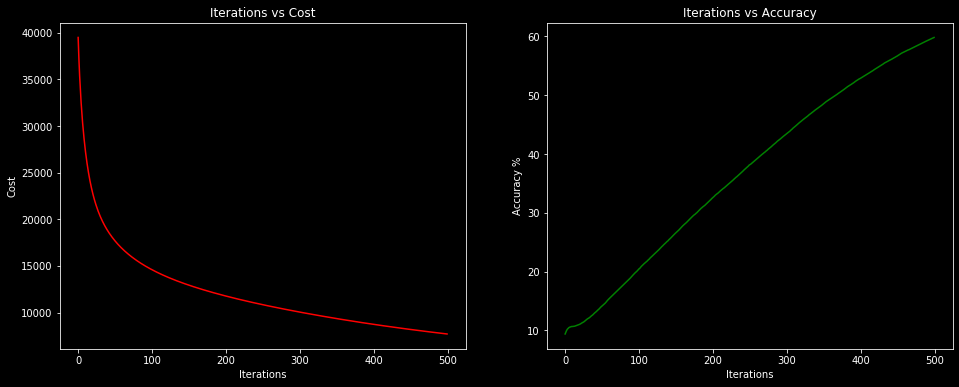

In [0]:
weight_5,bias_5 = forward(X_train,y_train,max_iter = 500,eta = 0.001,lam = 0.5,hidden_layers=[185,84,60,70])

Epoch: 1, Cost = 39491.29, Accuracy = 9.39%
Epoch: 101, Cost = 27340.18, Accuracy = 10.7%
Epoch: 201, Cost = 22774.15, Accuracy = 11.08%
Epoch: 301, Cost = 20339.79, Accuracy = 11.96%
Epoch: 401, Cost = 18798.69, Accuracy = 12.94%


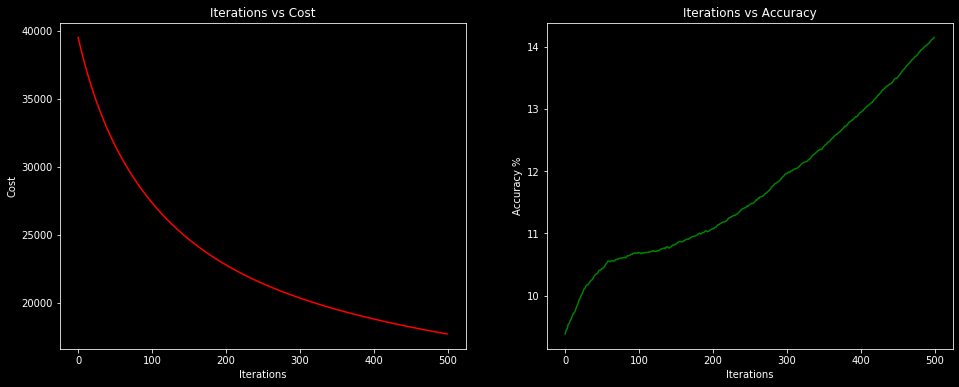

In [0]:
weight_6,bias_6 = forward(X_train,y_train,max_iter = 500,eta = 0.0001,lam = 0.5,hidden_layers=[185,84,60,70])

Epoch: 1, Cost = 39491.29, Accuracy = 9.39%
Epoch: 101, Cost = 2033.39, Accuracy = 90.0%
Epoch: 201, Cost = 1365.61, Accuracy = 93.18%
Epoch: 301, Cost = 1097.04, Accuracy = 94.54%
Epoch: 401, Cost = 933.39, Accuracy = 95.36%


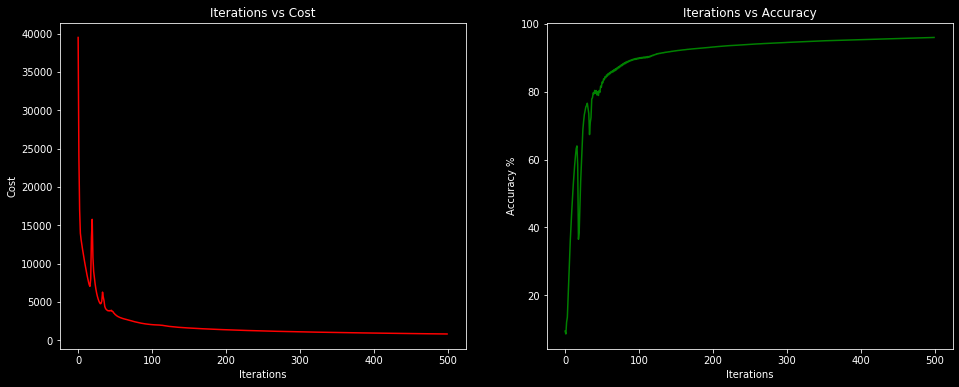

In [0]:
weight_7,bias_7 = forward(X_train,y_train,max_iter = 500,eta = 0.1,lam = 0.5,hidden_layers=[185,84,60,70])

Epoch: 1, Cost = 39491.29, Accuracy = 9.39%
Epoch: 101, Cost = 2566.18, Accuracy = 87.08%
Epoch: 201, Cost = 1765.2, Accuracy = 91.28%
Epoch: 301, Cost = 1451.26, Accuracy = 92.85%
Epoch: 401, Cost = 1256.46, Accuracy = 93.83%
Epoch: 501, Cost = 1120.7, Accuracy = 94.52%
Epoch: 601, Cost = 1018.41, Accuracy = 95.03%
Epoch: 701, Cost = 936.33, Accuracy = 95.4%
Epoch: 801, Cost = 868.13, Accuracy = 95.75%
Epoch: 901, Cost = 809.73, Accuracy = 96.08%


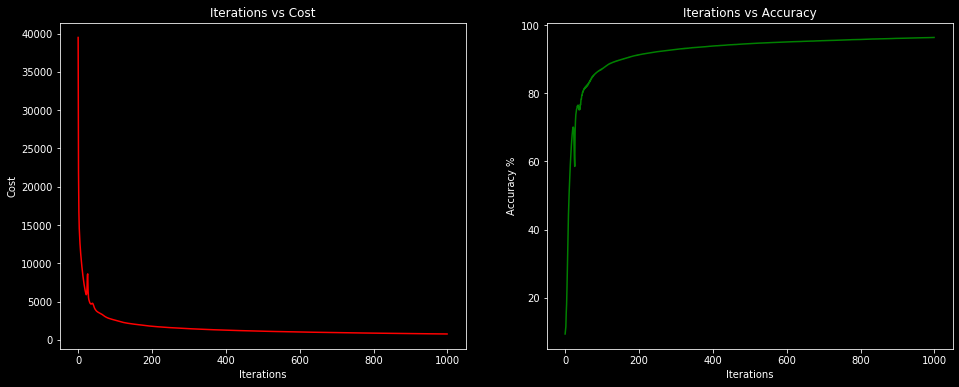

In [0]:
weight_8,bias_8 = forward(X_train,y_train,max_iter = 1000,eta = 0.05,lam = 0.5,hidden_layers=[185,84,60,70])

In [0]:
y_predicted_5 = predict(X_test,weight_5,bias_5,[185,84,60,70])
y_predicted_6 = predict(X_test,weight_6,bias_6,[185,84,60,70])
y_predicted_7 = predict(X_test,weight_7,bias_7,[185,84,60,70])
y_predicted_8 = predict(X_test,weight_8,bias_8,[185,84,60,70])


test_accuracy_5 = calculate_accuracy(y_predicted_5, y_test)
test_accuracy_6 = calculate_accuracy(y_predicted_6, y_test)
test_accuracy_7 = calculate_accuracy(y_predicted_7, y_test)
test_accuracy_8 = calculate_accuracy(y_predicted_8, y_test)

print("Accuracy on Test Set with fifth configuration = " + str(test_accuracy_5 * 100) + "%")
print("Accuracy on Test Set with sixth configuration = " + str(test_accuracy_6 * 100) + "%")
print("Accuracy on Test Set with seventh configuration = " + str(test_accuracy_7 * 100) + "%")
print("Accuracy on Test Set with eighth configuration = " + str(test_accuracy_8 * 100) + "%")

Accuracy on Test Set with fifth configuration = 60.84%
Accuracy on Test Set with sixth configuration = 13.850000000000001%
Accuracy on Test Set with seventh configuration = 94.86%
Accuracy on Test Set with eighth configuration = 95.08%


### Testing accuracies with 0.1 and 0.05 value of alpha is high : choosing 0.05 with 1000 epochs as a learning_rate for further analysis

### Training on different lambda values 

Epoch: 1, Cost = 39491.28, Accuracy = 9.39%
Epoch: 101, Cost = 2566.33, Accuracy = 87.08%
Epoch: 201, Cost = 1765.28, Accuracy = 91.27%
Epoch: 301, Cost = 1451.01, Accuracy = 92.85%
Epoch: 401, Cost = 1256.39, Accuracy = 93.82%
Epoch: 501, Cost = 1120.63, Accuracy = 94.53%
Epoch: 601, Cost = 1018.35, Accuracy = 95.04%
Epoch: 701, Cost = 936.26, Accuracy = 95.41%
Epoch: 801, Cost = 868.05, Accuracy = 95.75%
Epoch: 901, Cost = 809.66, Accuracy = 96.08%


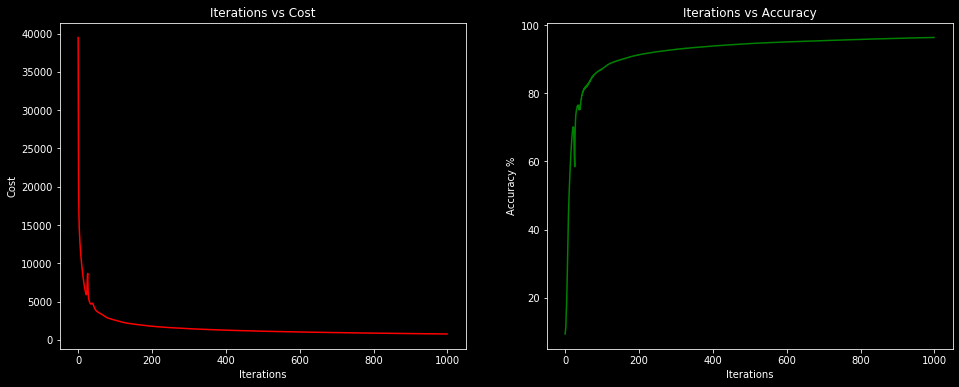

In [0]:
weight_9,bias_9 = forward(X_train,y_train,max_iter = 1000,eta = 0.05,lam = 0.5,hidden_layers=[185,84,60,70])

Epoch: 1, Cost = 39491.3, Accuracy = 9.39%
Epoch: 101, Cost = 2565.68, Accuracy = 87.08%
Epoch: 201, Cost = 1765.24, Accuracy = 91.27%
Epoch: 301, Cost = 1451.39, Accuracy = 92.85%
Epoch: 401, Cost = 1256.56, Accuracy = 93.82%


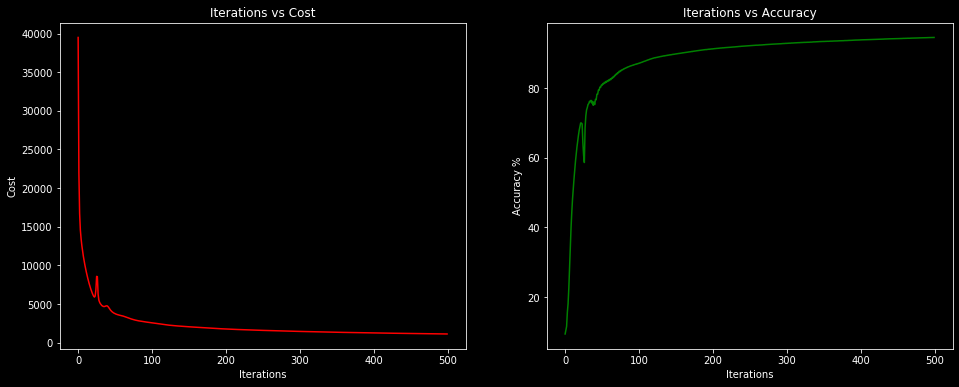

In [0]:
weight_11,bias_11 = forward(X_train,y_train,max_iter = 500,eta = 0.05,lam = 1.0,hidden_layers=[185,84,60,70])

Epoch: 1, Cost = 39491.32, Accuracy = 9.39%
Epoch: 101, Cost = 2565.65, Accuracy = 87.08%
Epoch: 201, Cost = 1765.08, Accuracy = 91.27%
Epoch: 301, Cost = 1451.6, Accuracy = 92.85%
Epoch: 401, Cost = 1256.53, Accuracy = 93.82%


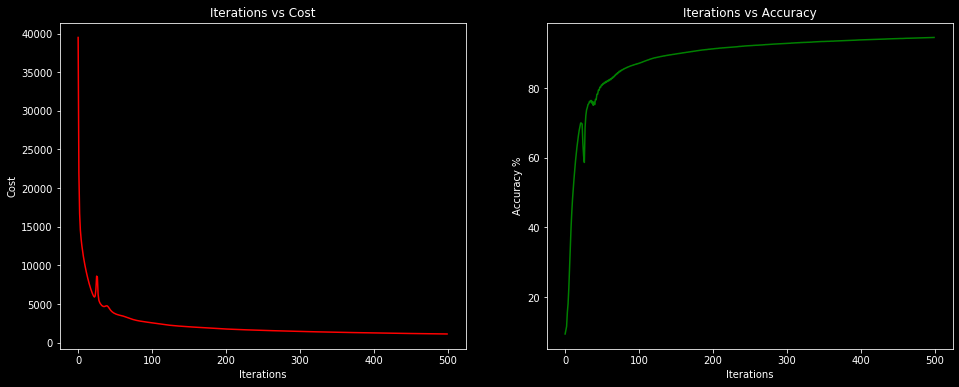

In [0]:
weight_12,bias_12 = forward(X_train,y_train,max_iter = 500,eta = 0.05,lam = 2.0,hidden_layers=[185,84,60,70])

In [0]:
y_predicted_9 = predict(X_test,weight_9,bias_9,[185,84,60,70])
#y_predicted_10 = predict(X_test,weight_10,bias_10,[185,84,60,70])
y_predicted_11 = predict(X_test,weight_11,bias_11,[185,84,60,70])
y_predicted_12 = predict(X_test,weight_12,bias_12,[185,84,60,70])


test_accuracy_9 = calculate_accuracy(y_predicted_9, y_test)
#test_accuracy_10 = calculate_accuracy(y_predicted_10, y_test)
test_accuracy_11 = calculate_accuracy(y_predicted_11, y_test)
test_accuracy_12 = calculate_accuracy(y_predicted_12, y_test)

print("Accuracy on Test Set with ninth configuration = " + str(test_accuracy_9 * 100) + "%")
#print("Accuracy on Test Set with sixth configuration = " + str(test_accuracy_10 * 100) + "%")
print("Accuracy on Test Set with eleventh configuration = " + str(test_accuracy_11 * 100) + "%")
print("Accuracy on Test Set with twelth configuration = " + str(test_accuracy_12 * 100) + "%")

Accuracy on Test Set with ninth configuration = 95.08%
Accuracy on Test Set with eleventh configuration = 93.64%
Accuracy on Test Set with twelth configuration = 93.63%


### Testing accuracies with 0.0 and 0.5 lambda values is high: choosing 0.5 lambda value for best configuration

### Best Configuration:
* hidden_layers = 4 layers as [185,84,60,70]
* learning_rate = 0.1 with 500 epochs and 0.05 with 1000 epochs
* lambda = 0.5 and 0.0 depending on the epochs
### Discussion:
* so with the above detailed analysis with all the hyper parameters, I can conclude that neural network with four layers, 1000 epochs and learning rate as 0.05 and lambda as 0.5 works best for me as it gives the highest test accuracy from all the configurations I have shown above